In [133]:
#Importing Dependencies 
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [134]:
#Inputing datasets
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [135]:
#Quick Preprocessing steps 
#1.check null 
for column in charity_df.columns:
    print(f"Column {column} has {charity_df[column].isnull().sum()} null values")

Column EIN has 0 null values
Column NAME has 0 null values
Column APPLICATION_TYPE has 0 null values
Column AFFILIATION has 0 null values
Column CLASSIFICATION has 0 null values
Column USE_CASE has 0 null values
Column ORGANIZATION has 0 null values
Column STATUS has 0 null values
Column INCOME_AMT has 0 null values
Column SPECIAL_CONSIDERATIONS has 0 null values
Column ASK_AMT has 0 null values
Column IS_SUCCESSFUL has 0 null values


In [136]:
#2.Checking for duplicates

# Find duplicate entries
print(f"Duplicate entries: {charity_df.duplicated().sum()}")

Duplicate entries: 0


In [137]:
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [138]:
# Check the number of unique values in each column

# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object" ].index.tolist()


In [139]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()


NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [140]:
charity_cat = charity_df.dtypes[charity_df.dtypes == "int64" ].index.tolist()
charity_df[charity_cat].nunique()

EIN              34299
STATUS               2
ASK_AMT           8747
IS_SUCCESSFUL        2
dtype: int64

In [141]:
#According to nuiques method we have some of the categories with more then 10  unique values so bucketing the categories 

In [142]:
# uSING ONE HOT ENCODING, but in order to save memory we will be bucketing the data 
NAME_counts = charity_df.NAME.value_counts()
NAME_counts

PARENT BOOSTER USA INC                                             1260
TOPS CLUB INC                                                       765
UNITED STATES BOWLING CONGRESS INC                                  700
WASHINGTON STATE UNIVERSITY                                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                     408
                                                                   ... 
DESERT PIRATE BOOSTER CLUB                                            1
NATIONAL LATINO LAW ENFORCEMENT ORGANIZATION-FORT WORTH CHAPTER       1
LOVE ABUNDANT MINISTRIES                                              1
COMMON SENSE SOLUTIONS INC                                            1
VETERANS OF PEACE INC                                                 1
Name: NAME, Length: 19568, dtype: int64

In [143]:
#sorting the data to check values for  name :  
# making boolean series for a team name 
name = charity_df['NAME']=="PARENT BOOSTER USA INC"
# display 
charity_df[name]

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
158,10936099,PARENT BOOSTER USA INC,T3,CompanySponsored,C2100,Preservation,Trust,1,0,N,5000,0
185,10970424,PARENT BOOSTER USA INC,T3,CompanySponsored,C2100,Preservation,Trust,1,0,N,5000,0
667,61826038,PARENT BOOSTER USA INC,T3,CompanySponsored,C2100,Preservation,Trust,1,25000-99999,N,9206,0
881,141846176,PARENT BOOSTER USA INC,T3,CompanySponsored,C2100,Preservation,Trust,1,0,N,5000,0
1805,203113699,PARENT BOOSTER USA INC,T3,CompanySponsored,C2100,Preservation,Trust,1,0,N,5000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31484,901011798,PARENT BOOSTER USA INC,T3,CompanySponsored,C2100,Preservation,Trust,1,0,N,5000,0
31488,901020631,PARENT BOOSTER USA INC,T3,CompanySponsored,C2100,Preservation,Trust,1,0,N,5000,1
31499,901033213,PARENT BOOSTER USA INC,T3,CompanySponsored,C2100,Preservation,Trust,1,0,N,5000,0
31859,911646768,PARENT BOOSTER USA INC,T3,CompanySponsored,C2100,Preservation,Trust,1,0,N,5000,1


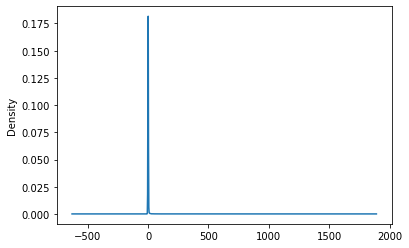

In [144]:
#Bucketing the uncommon with others 
# Visualize the value counts
NAME_counts.plot.density()


In [145]:
#one-hot encoding is a very robust solution, it can be very memory-intensive. 
#Therefore, categorical variables with a large number of unique values will be dropped.

In [146]:
#To make our neuarak network work more fairly , without introducing any addititonal risk , we
#will drop the columns which are are not useful 

# Remove the column
charity_df.drop(columns=["NAME"], inplace=True)
charity_df.head()

,EIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [147]:
#checking unique count and density count for other columns 
list(charity_df.columns.values)

['EIN',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'STATUS',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT',
 'IS_SUCCESSFUL']

In [148]:
# Print out the EIN value counts
EIN_counts = charity_df.EIN.value_counts()
EIN_counts

471361061    1
716145914    1
470850777    1
742622426    1
436124893    1
            ..
205040320    1
461149136    1
474460867    1
204833477    1
352260098    1
Name: EIN, Length: 34299, dtype: int64

In [149]:
#ALL unique Value so dropping this column 
# Remove the column
charity_df.drop(columns=["EIN"], inplace=True)
charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [150]:
list(charity_df.columns.values)

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'STATUS',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT',
 'IS_SUCCESSFUL']

In [151]:
#checking Application type 
APPLICATION_TYPE_counts = charity_df.APPLICATION_TYPE.value_counts()
APPLICATION_TYPE_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

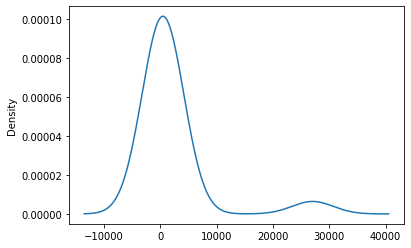

In [152]:
#Checking the unique count we can see there are number of pplications that appear frequently in the dataset

# Visualize the value counts
APPLICATION_TYPE_counts.plot.density()

In [153]:
#Checking the values in applicatnt count and graph taking 1000 to bucket our data 
# Determine which values to replace
replace_APPLICATION_TYPE = list(APPLICATION_TYPE_counts[APPLICATION_TYPE_counts < 1000].index)

# Replace in DataFrame
for i in replace_APPLICATION_TYPE:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(i,"Other")


# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [154]:
charity_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [155]:
# Generate our categorical variable list 
#tackiling all object datatypes
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()


In [156]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()


APPLICATION_TYPE           6
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [157]:
#According to the llist we have classification with more thean 10 unique values
# Print out the CLASSIFICATION value counts
CLASSIFICATION_counts =charity_df.CLASSIFICATION.value_counts()
CLASSIFICATION_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2600        1
C1283        1
C3700        1
C1245        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

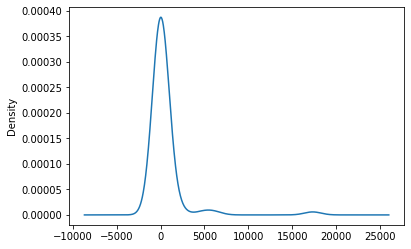

In [158]:
# Visualize the value counts
CLASSIFICATION_counts.plot.density()

In [159]:
#taking 2000 to bucket 
# Determine which values to replace
replace_CLASSIFICATION = list(CLASSIFICATION_counts[CLASSIFICATION_counts < 2000].index)

# Replace in DataFrame
for i in replace_CLASSIFICATION:
    charity_df.CLASSIFICATION =charity_df.CLASSIFICATION.replace(i,"Other")


# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [160]:
# Generate our categorical variable list 
#tackiling all object datatypes
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [161]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            4
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [162]:
charity_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [163]:
# Generate our categorical variable list 
#tackiling all int datatypes
charity_cat = charity_df.dtypes[charity_df.dtypes == "int64"].index.tolist()

In [164]:
charity_df[charity_cat ].nunique()

STATUS              2
ASK_AMT          8747
IS_SUCCESSFUL       2
dtype: int64

In [165]:
ASK_AMT_counts = charity_df.ASK_AMT.value_counts()
ASK_AMT_counts

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

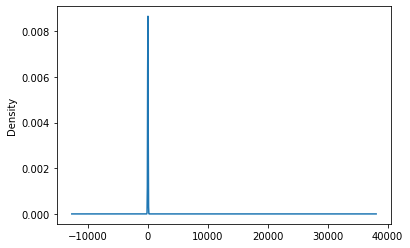

In [166]:
# Visualize the value counts
ASK_AMT_counts.plot.density()

In [167]:
#ask amount has mostly unique value dropping this column 
charity_df.drop(columns=["ASK_AMT"], inplace=True)
charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,1,0,N,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1
2,T5,CompanySponsored,Other,ProductDev,Association,1,0,N,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1


In [168]:
charity_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
IS_SUCCESSFUL              int64
dtype: object

In [169]:
# Generate our categorical variable list_check 1
cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [170]:
# Check the number of unique values in each column
charity_df[cat].nunique()


APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            4
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [171]:
# Generate our categorical variable list_check 2
cat = charity_df.dtypes[charity_df.dtypes == "int64"].index.tolist()

In [172]:
# Check the number of unique values in each column
charity_df[cat].nunique()

STATUS           2
IS_SUCCESSFUL    2
dtype: int64

In [173]:
#According to the nunique method, none of the categorical variables have more than 10 unique values, 
# we are ready to Encode

In [174]:
charity_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'IS_SUCCESSFUL'],
      dtype='object')

In [175]:
charity_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
IS_SUCCESSFUL              int64
dtype: object

In [176]:
#changing the datatype 
charity_df['STATUS']=charity_df.STATUS.astype(object)
charity_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                    object
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
IS_SUCCESSFUL              int64
dtype: object

In [177]:
charity_df['IS_SUCCESSFUL']=charity_df.IS_SUCCESSFUL.astype(object)
charity_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                    object
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
IS_SUCCESSFUL             object
dtype: object

In [178]:
# Generate our categorical variable list
cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()


In [179]:
# Check the number of unique values in each column
charity_df[cat].nunique()


APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            4
USE_CASE                  5
ORGANIZATION              4
STATUS                    2
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
IS_SUCCESSFUL             2
dtype: int64

In [180]:
#none of the categorical variables have more than 10 unique values, which means we’re ready to encode

In [181]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,IS_SUCCESSFUL_0,IS_SUCCESSFUL_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [182]:
encode_df.dtypes

APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64
USE_CASE_Heathcare              float64
USE_CASE_Other                  float64
USE_CASE_Preservation           float64
USE_CASE_ProductDev             float64
ORGANIZATION_Association        float64
ORGANIZATION_Co-operative       float64
ORGANIZATION_Corporation        float64
ORGANIZATION_Trust              float64


In [183]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encode_df,left_index=True, right_index=True)
charity_df = charity_df.drop(cat,1)
charity_df.head()


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,IS_SUCCESSFUL_0,IS_SUCCESSFUL_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [184]:
charity_df.dtypes

APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64
USE_CASE_Heathcare              float64
USE_CASE_Other                  float64
USE_CASE_Preservation           float64
USE_CASE_ProductDev             float64
ORGANIZATION_Association        float64
ORGANIZATION_Co-operative       float64
ORGANIZATION_Corporation        float64
ORGANIZATION_Trust              float64


In [185]:
# Split our preprocessed data into our features and target arrays
y = charity_df["IS_SUCCESSFUL_0"].values
X = charity_df.drop(["IS_SUCCESSFUL_0","IS_SUCCESSFUL_1"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [186]:
#Building our standard scaler object nad standardize the numerical features 
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [206]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 8)                 312       
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 6         
Total params: 363
Trainable params: 363
Non-trainable params: 0
_________________________________________________________________


In [188]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [189]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.6303 - accuracy: 0.6586
Epoch 2/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5782 - accuracy: 0.7189
Epoch 3/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5680 - accuracy: 0.7250
Epoch 4/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5640 - accuracy: 0.7273
Epoch 5/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5625 - accuracy: 0.7280
Epoch 6/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5617 - accuracy: 0.7274
Epoch 7/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5609 - accuracy: 0.7278
Epoch 8/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5597 - accuracy: 0.7287
Epoch 9/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5594 - accuracy: 0.7290
Epoch

25724/25724 [==============================] - 1s 43us/sample - loss: 0.5534 - accuracy: 0.7320
Epoch 76/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5538 - accuracy: 0.7329
Epoch 77/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5536 - accuracy: 0.7318
Epoch 78/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5536 - accuracy: 0.7320
Epoch 79/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5533 - accuracy: 0.7327
Epoch 80/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5534 - accuracy: 0.7318
Epoch 81/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5535 - accuracy: 0.7318
Epoch 82/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5532 - accuracy: 0.7320
Epoch 83/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5536 - accuracy: 0.7315
Epoch 84/100
25724/25724 [======

In [192]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5616 - accuracy: 0.7233
Loss: 0.5615844082554298, Accuracy: 0.7232652902603149


In [193]:
# Train the model with more epochs to see if the accuracy increses 
fit_model = nn.fit(X_train,y_train,epochs=500)

Train on 25724 samples
Epoch 1/500
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5507 - accuracy: 0.7339
Epoch 2/500
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5508 - accuracy: 0.7341
Epoch 3/500
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5508 - accuracy: 0.7334
Epoch 4/500
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5511 - accuracy: 0.7343
Epoch 5/500
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5508 - accuracy: 0.7332
Epoch 6/500
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5508 - accuracy: 0.7329
Epoch 7/500
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5509 - accuracy: 0.7340
Epoch 8/500
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5507 - accuracy: 0.7339
Epoch 9/500
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5509 - accuracy: 0.7333
Epoch

25724/25724 [==============================] - 1s 42us/sample - loss: 0.5504 - accuracy: 0.7344
Epoch 77/500
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5507 - accuracy: 0.7341
Epoch 78/500
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5503 - accuracy: 0.7344
Epoch 79/500
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5508 - accuracy: 0.7329
Epoch 80/500
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5506 - accuracy: 0.7341
Epoch 81/500
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5504 - accuracy: 0.7340
Epoch 82/500
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5504 - accuracy: 0.7335
Epoch 83/500
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5506 - accuracy: 0.7345
Epoch 84/500
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5506 - accuracy: 0.7336
Epoch 85/500
25724/25724 [======

25724/25724 [==============================] - 1s 42us/sample - loss: 0.5503 - accuracy: 0.7346
Epoch 151/500
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5503 - accuracy: 0.7333
Epoch 152/500
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5503 - accuracy: 0.7350
Epoch 153/500
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5503 - accuracy: 0.7349
Epoch 154/500
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5502 - accuracy: 0.7343
Epoch 155/500
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5502 - accuracy: 0.7341
Epoch 156/500
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5504 - accuracy: 0.7344
Epoch 157/500
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5502 - accuracy: 0.7346
Epoch 158/500
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5503 - accuracy: 0.7343
Epoch 159/500
25724/2572

25724/25724 [==============================] - 1s 38us/sample - loss: 0.5502 - accuracy: 0.7336
Epoch 225/500
25724/25724 [==============================] - 1s 37us/sample - loss: 0.5502 - accuracy: 0.7341
Epoch 226/500
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5500 - accuracy: 0.7338
Epoch 227/500
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5502 - accuracy: 0.7346
Epoch 228/500
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5498 - accuracy: 0.7341
Epoch 229/500
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5502 - accuracy: 0.7345s - l
Epoch 230/500
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5502 - accuracy: 0.7348
Epoch 231/500
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5501 - accuracy: 0.7343
Epoch 232/500
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5501 - accuracy: 0.7346
Epoch 233/500
25724

25724/25724 [==============================] - 1s 38us/sample - loss: 0.5501 - accuracy: 0.7343
Epoch 299/500
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5500 - accuracy: 0.7344
Epoch 300/500
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5498 - accuracy: 0.7344
Epoch 301/500
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5501 - accuracy: 0.7348
Epoch 302/500
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5496 - accuracy: 0.7344
Epoch 303/500
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5498 - accuracy: 0.7342
Epoch 304/500
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5503 - accuracy: 0.7341
Epoch 305/500
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5500 - accuracy: 0.7348
Epoch 306/500
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5500 - accuracy: 0.7346
Epoch 307/500
25724/2572

25724/25724 [==============================] - 1s 49us/sample - loss: 0.5496 - accuracy: 0.7341
Epoch 373/500
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5498 - accuracy: 0.7346
Epoch 374/500
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5502 - accuracy: 0.7343
Epoch 375/500
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5501 - accuracy: 0.7343
Epoch 376/500
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5500 - accuracy: 0.7340
Epoch 377/500
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5500 - accuracy: 0.7345
Epoch 378/500
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5496 - accuracy: 0.7342
Epoch 379/500
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5499 - accuracy: 0.7344
Epoch 380/500
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5499 - accuracy: 0.7340
Epoch 381/500
25724/2572

25724/25724 [==============================] - 1s 38us/sample - loss: 0.5499 - accuracy: 0.7339
Epoch 447/500
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5499 - accuracy: 0.7349
Epoch 448/500
25724/25724 [==============================] - 1s 53us/sample - loss: 0.5498 - accuracy: 0.7343
Epoch 449/500
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5497 - accuracy: 0.7346
Epoch 450/500
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5497 - accuracy: 0.7348
Epoch 451/500
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5500 - accuracy: 0.7343
Epoch 452/500
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5500 - accuracy: 0.7349
Epoch 453/500
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5501 - accuracy: 0.7346
Epoch 454/500
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5499 - accuracy: 0.7340
Epoch 455/500
25724/2572

In [194]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5617 - accuracy: 0.7231
Loss: 0.561685473168209, Accuracy: 0.7231487035751343


In [195]:
# Define the model - deep neural net
#Adding another layer
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# third  hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 312       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [196]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [198]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 2s 62us/sample - loss: 0.6312 - accuracy: 0.6882
Epoch 2/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5865 - accuracy: 0.7199
Epoch 3/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5769 - accuracy: 0.7206
Epoch 4/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5719 - accuracy: 0.7235
Epoch 5/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5692 - accuracy: 0.7246
Epoch 6/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5670 - accuracy: 0.7255
Epoch 7/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5647 - accuracy: 0.7276s - loss: 0
Epoch 8/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5633 - accuracy: 0.7289
Epoch 9/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5621 - accuracy: 0

25724/25724 [==============================] - 1s 40us/sample - loss: 0.5541 - accuracy: 0.7317s - loss: 0.557
Epoch 76/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5534 - accuracy: 0.7327
Epoch 77/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5532 - accuracy: 0.7322
Epoch 78/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5537 - accuracy: 0.7312
Epoch 79/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5536 - accuracy: 0.7315
Epoch 80/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5538 - accuracy: 0.7321
Epoch 81/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5534 - accuracy: 0.7322
Epoch 82/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5538 - accuracy: 0.7318
Epoch 83/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5536 - accuracy: 0.7321
Epoch 84/100
2572

In [199]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5590 - accuracy: 0.7241
Loss: 0.5590280763539907, Accuracy: 0.7240816354751587


In [200]:
# Train the model
# adding mpre epochs affetr adding hidden layer 
fit_model = nn.fit(X_train,y_train,epochs=300)

Train on 25724 samples
Epoch 1/300
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5532 - accuracy: 0.7323
Epoch 2/300
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5528 - accuracy: 0.7325
Epoch 3/300
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5530 - accuracy: 0.7325
Epoch 4/300
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5528 - accuracy: 0.7329s - loss: 0
Epoch 5/300
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5530 - accuracy: 0.7327
Epoch 6/300
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5529 - accuracy: 0.7323
Epoch 7/300
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5528 - accuracy: 0.7321
Epoch 8/300
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5530 - accuracy: 0.7322
Epoch 9/300
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5529 - accuracy: 0

25724/25724 [==============================] - 1s 40us/sample - loss: 0.5517 - accuracy: 0.7326
Epoch 75/300
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5520 - accuracy: 0.7327
Epoch 76/300
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5516 - accuracy: 0.7340
Epoch 77/300
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5518 - accuracy: 0.7332
Epoch 78/300
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5518 - accuracy: 0.7333
Epoch 79/300
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5518 - accuracy: 0.7332
Epoch 80/300
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5518 - accuracy: 0.7335
Epoch 81/300
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5518 - accuracy: 0.7328
Epoch 82/300
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5518 - accuracy: 0.7324
Epoch 83/300
25724/25724 [======

Epoch 148/300
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5510 - accuracy: 0.7342
Epoch 149/300
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5508 - accuracy: 0.7338
Epoch 150/300
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5508 - accuracy: 0.7334
Epoch 151/300
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5512 - accuracy: 0.7336
Epoch 152/300
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5510 - accuracy: 0.7346
Epoch 153/300
25724/25724 [==============================] - 1s 55us/sample - loss: 0.5509 - accuracy: 0.7338
Epoch 154/300
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5507 - accuracy: 0.7340
Epoch 155/300
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5507 - accuracy: 0.7340
Epoch 156/300
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5513 - accuracy: 0.7340
Epoch 157/

25724/25724 [==============================] - 1s 43us/sample - loss: 0.5505 - accuracy: 0.7342
Epoch 223/300
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5505 - accuracy: 0.7352
Epoch 224/300
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5506 - accuracy: 0.7346
Epoch 225/300
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5504 - accuracy: 0.7347
Epoch 226/300
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5503 - accuracy: 0.7340
Epoch 227/300
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5507 - accuracy: 0.7345
Epoch 228/300
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5505 - accuracy: 0.7348
Epoch 229/300
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5504 - accuracy: 0.7343
Epoch 230/300
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5510 - accuracy: 0.7349
Epoch 231/300
25724/2572

25724/25724 [==============================] - 1s 43us/sample - loss: 0.5502 - accuracy: 0.7346
Epoch 297/300
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5501 - accuracy: 0.7348
Epoch 298/300
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5500 - accuracy: 0.7352
Epoch 299/300
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5503 - accuracy: 0.7351
Epoch 300/300
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5505 - accuracy: 0.7344


In [201]:
# Evaluate the model using the test data
#accuracy increase but not to significant 
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5602 - accuracy: 0.7262
Loss: 0.5602301655913928, Accuracy: 0.7261807322502136


In [202]:

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [208]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True)
    # ERROR save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
24672/25724 [===========================>..] - ETA: 0s - loss: 0.6411 - accuracy: 0.6815
Epoch 00001: saving model to checkpoints/weights.01.hdf5
25724/25724 [==============================] - 2s 59us/sample - loss: 0.6392 - accuracy: 0.6837
Epoch 2/100
25280/25724 [============================>.] - ETA: 0s - loss: 0.5880 - accuracy: 0.7259
Epoch 00002: saving model to checkpoints/weights.02.hdf5
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5884 - accuracy: 0.7256
Epoch 3/100
24800/25724 [===========================>..] - ETA: 0s - loss: 0.5778 - accuracy: 0.7279
Epoch 00003: saving model to checkpoints/weights.03.hdf5
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5787 - accuracy: 0.7269
Epoch 4/100
24608/25724 [===========================>..] - ETA: 0s - loss: 0.5752 - accuracy: 0.7288
Epoch 00004: saving model to checkpoints/weights.04.hdf5
25724/25724 [==============================] - 2s 63us/sa

24640/25724 [===========================>..] - ETA: 0s - loss: 0.5575 - accuracy: 0.7310
Epoch 00033: saving model to checkpoints/weights.33.hdf5
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5581 - accuracy: 0.7304
Epoch 34/100
25152/25724 [============================>.] - ETA: 0s - loss: 0.5573 - accuracy: 0.7317
Epoch 00034: saving model to checkpoints/weights.34.hdf5
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5577 - accuracy: 0.7311
Epoch 35/100
24864/25724 [===========================>..] - ETA: 0s - loss: 0.5581 - accuracy: 0.7305
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25724/25724 [==============================] - 1s 54us/sample - loss: 0.5578 - accuracy: 0.7307
Epoch 36/100
25344/25724 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7309
Epoch 00036: saving model to checkpoints/weights.36.hdf5
25724/25724 [==============================] - 1s 53us/sample - loss: 0.5570 - accuracy: 

24544/25724 [===========================>..] - ETA: 0s - loss: 0.5562 - accuracy: 0.7311
Epoch 00065: saving model to checkpoints/weights.65.hdf5
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5557 - accuracy: 0.7315
Epoch 66/100
24864/25724 [===========================>..] - ETA: 0s - loss: 0.5561 - accuracy: 0.7299
Epoch 00066: saving model to checkpoints/weights.66.hdf5
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5554 - accuracy: 0.7304
Epoch 67/100
25472/25724 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.7312
Epoch 00067: saving model to checkpoints/weights.67.hdf5
25724/25724 [==============================] - 1s 53us/sample - loss: 0.5553 - accuracy: 0.7314
Epoch 68/100
25504/25724 [============================>.] - ETA: 0s - loss: 0.5560 - accuracy: 0.7303
Epoch 00068: saving model to checkpoints/weights.68.hdf5
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5557 - accuracy: 

25632/25724 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7310
Epoch 00097: saving model to checkpoints/weights.97.hdf5
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5540 - accuracy: 0.7311
Epoch 98/100
24832/25724 [===========================>..] - ETA: 0s - loss: 0.5539 - accuracy: 0.7312
Epoch 00098: saving model to checkpoints/weights.98.hdf5
25724/25724 [==============================] - 1s 54us/sample - loss: 0.5540 - accuracy: 0.7311
Epoch 99/100
25696/25724 [============================>.] - ETA: 0s - loss: 0.5538 - accuracy: 0.7315
Epoch 00099: saving model to checkpoints/weights.99.hdf5
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5538 - accuracy: 0.7316
Epoch 100/100
25632/25724 [============================>.] - ETA: 0s - loss: 0.5538 - accuracy: 0.7313
Epoch 00100: saving model to checkpoints/weights.100.hdf5
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5540 - accuracy

In [209]:
#Restored weights using checkpoints 
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))



# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5643 - accuracy: 0.7220
Loss: 0.564304210465434, Accuracy: 0.721982479095459


In [ ]:
#Using the checkpoints, we were able to regenerate the model instantaneously and confirm the model was able to produce the exact same results.

In [210]:
#For Importing and exporting entire model 
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")


In [211]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')


In [212]:
#Testing the data again 
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


8575/8575 - 0s - loss: 0.5643 - accuracy: 0.7220
Loss: 0.564304210465434, Accuracy: 0.721982479095459
